In [1]:
import matplotlib
import matplotlib.pyplot as plt
# 在jupyter中可显示或者使用savefig保存图像, 即plt.savefig('xxx.jpg')

In [2]:
# 风格设置
def set_default(figsize=(10, 10), dpi=100):
    plt.style.use(['dark_background', 'bmh'])
    plt.rc('axes', facecolor='k')
    plt.rc('figure', facecolor='k')
    plt.rc('figure', figsize=figsize, dpi=dpi)
set_default()

'''
print(plt.style.available)
['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']
plt.style.use('bmh')

plt.rc()用于rc参数; 如plt.rc('axes', facecolor='k')相当于rcParams['axes.facecolor']='k'(black, 'r'/red, 'g'/green)
'figure': 图像
    dpi: 分辨率
    figsize: 显示大小
    facecolor: 颜色
'axes': 子图
    facecolor: 子图区域颜色
    edgecolor: 子图边框颜色
'lines': 线条样式
    linewidth: 图像线条宽度
'xtick'/'ytick': 横轴/纵轴刻度
    color
'text':
    color
'''

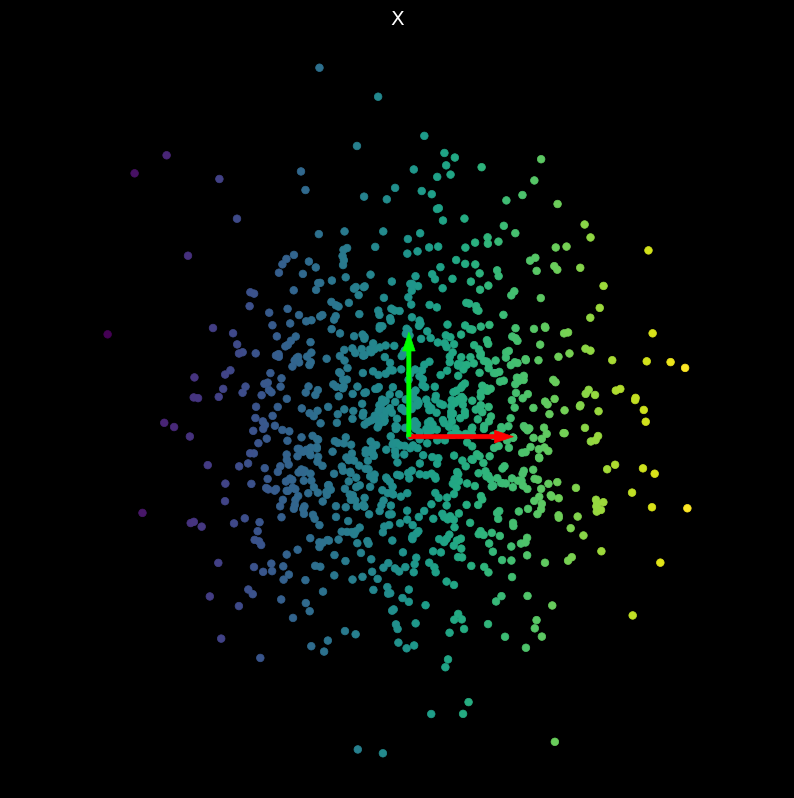

In [10]:
import torch
n_points = 1000
X = torch.randn(n_points, 2)
colors = X[:, 0]

def show_scatterplot(X, colors, title=''):
    colors = colors.cpu().numpy()
    X = X.cpu().numpy()
    plt.figure()
    plt.axis('equal')
    plt.scatter(X[:, 0], X[:, 1], c=colors, s=30)
    # plt.grid(True)
    plt.title(title)
    plt.axis('off')

def plot_bases(bases, width=0.04):
    bases = bases.cpu()
    bases[2:] -= bases[:2]
    plt.arrow(*bases[0], *bases[2], width=width, color=(1,0,0), zorder=10, alpha=1., length_includes_head=True)
    plt.arrow(*bases[1], *bases[3], width=width, color=(0,1,0), zorder=10, alpha=1., length_includes_head=True)

show_scatterplot(X, colors, title='X')
OI = torch.cat((torch.zeros(2, 2), torch.eye(2)))
plot_bases(OI)

'''
plt.cla(): 清除axes, 即当前figure中的活动的axes, 但其他axes保持不变
plt.clf(): 清除当前figure的所有axes, 但是不关闭这个window, 所以能继续复用于其他的plot
plt.close(): 关闭 window, 如果没有指定, 则指当前window

plt.figure(figsize): 生成图
ax1 = fig.add_subplot(121): 生成第一个子图在1行2列第一列位置
ax2 = fig.add_subplot(122): 生成第二子图在1行2列第二列位置
ax2.set_title('xxx')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 3.2))

plt.axis('square'): 作图为正方形, 并且x,y轴范围相同
plt.axis('equal'): x,y轴刻度等长
plt.axis('off'): 关闭坐标轴
plt.axis([a, b, c, d]): 设置x轴的范围为[a, b], y轴的范围为[c, d]
plt.grid(True)
plt.axvline(0, ymin, color, lw=1, zorder=0): 在坐标轴上添加一条垂直线, 第一个参数为垂直线数据坐标中的x位置, ymin,ymax: 应该在0到1之间, 0是曲线的底部, 1是曲线的顶部
plt.axhline(0, xmin, color, lw=1, zorder=0): 在坐标轴上添加一条水平线, 第一个参数为水平线数据坐标中的y位置, xmin,xmax: 应该在0到1之间, 0是曲线的左部, 1是曲线的右部
    linewidth/lw
    zorder越大, 则图像越置于表层

plt.xlabel('xxx')
plt.ylabel('xxx')

plt.tight_layout(): 会自动调整子图参数, 使之填充整个图像区域

plt.title(title='')
plt.legend(): 图例, 会显示label的内容; 参数loc可取'upper right'

图像:
plt.scatter(): 参数cmap可取值plt.cm.Spectral
plt.arrow(): 前四个参数分别指箭头尾部的坐标和头部的坐标; width: 箭头尾部的宽度; length_includes_head: 长度是否包含箭头
plt.plot(): 有参数label
plt.contourf(): 用来画出不同分类的边界线
'''


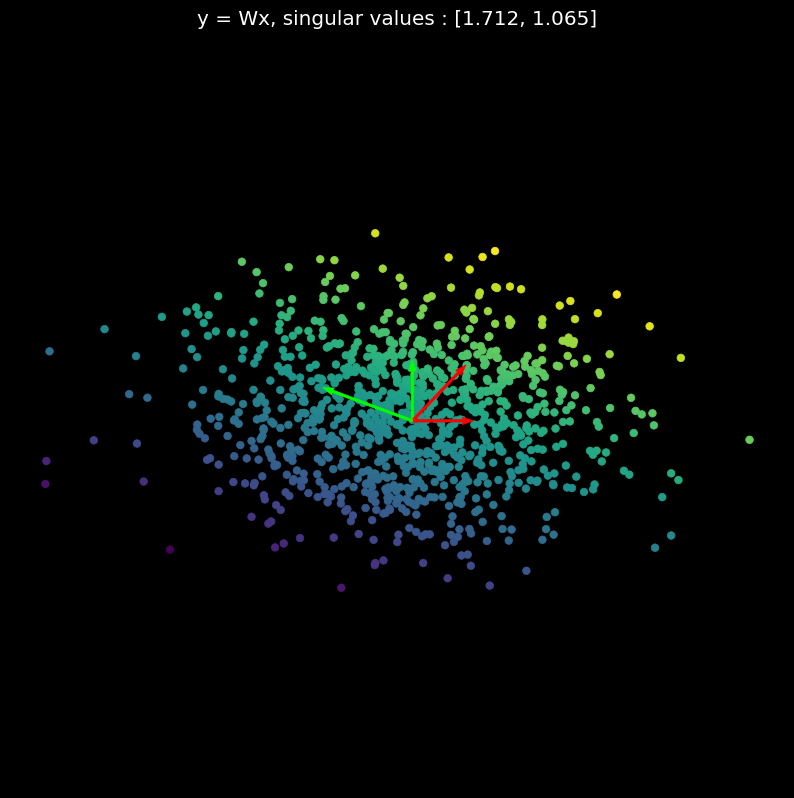

In [12]:
W = torch.randn(2, 2)
Y = X @ W.t()
U, S, V = torch.svd(W)
show_scatterplot(Y, colors, title='y = Wx, singular values : [{:.3f}, {:.3f}]'.format(S[0], S[1]))
new_OI = OI @ W.t()
plot_bases(OI)
plot_bases(new_OI)
    

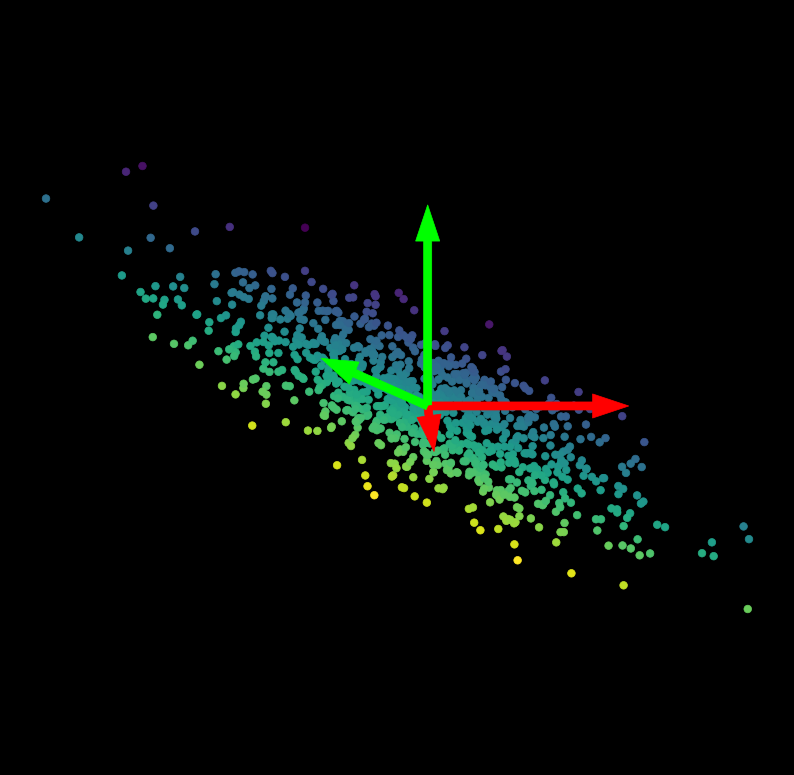

In [13]:
from torch import nn
model = nn.Sequential(
        nn.Linear(2, 2, bias=False)
)
with torch.no_grad():
    Y = model(X)
    show_scatterplot(Y, colors)
    plot_bases(OI)
    plot_bases(model(OI))

Text(0.5, 1.0, 'tanh() non linearity')

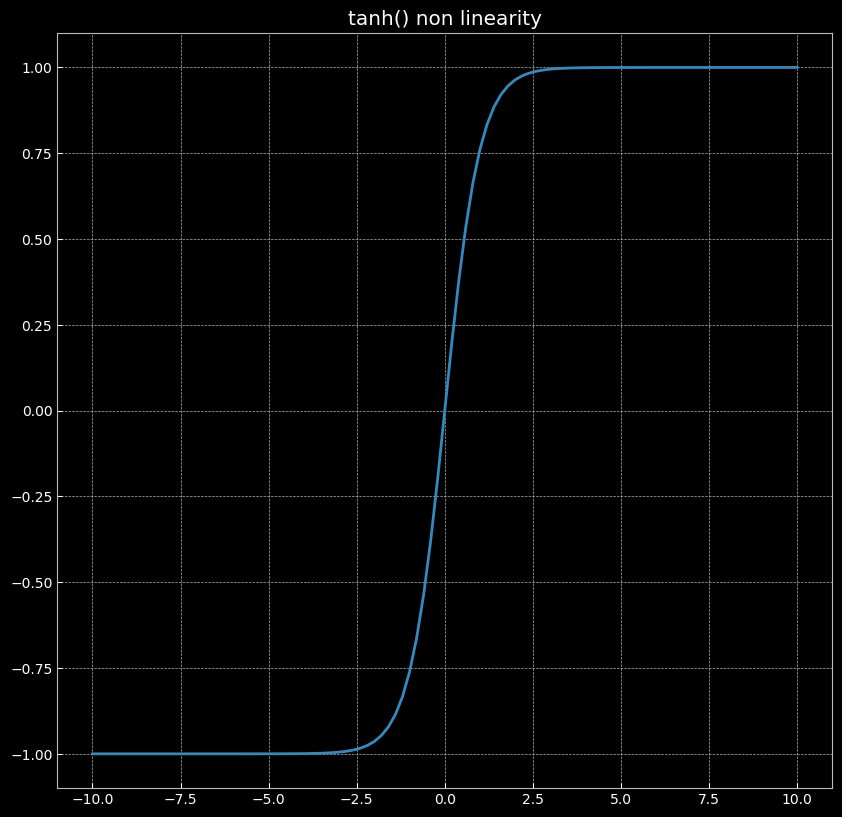

In [14]:

z = torch.linspace(-10, 10, 101)
s = torch.tanh(z)
plt.plot(z.numpy(), s.numpy())
plt.title('tanh() non linearity')

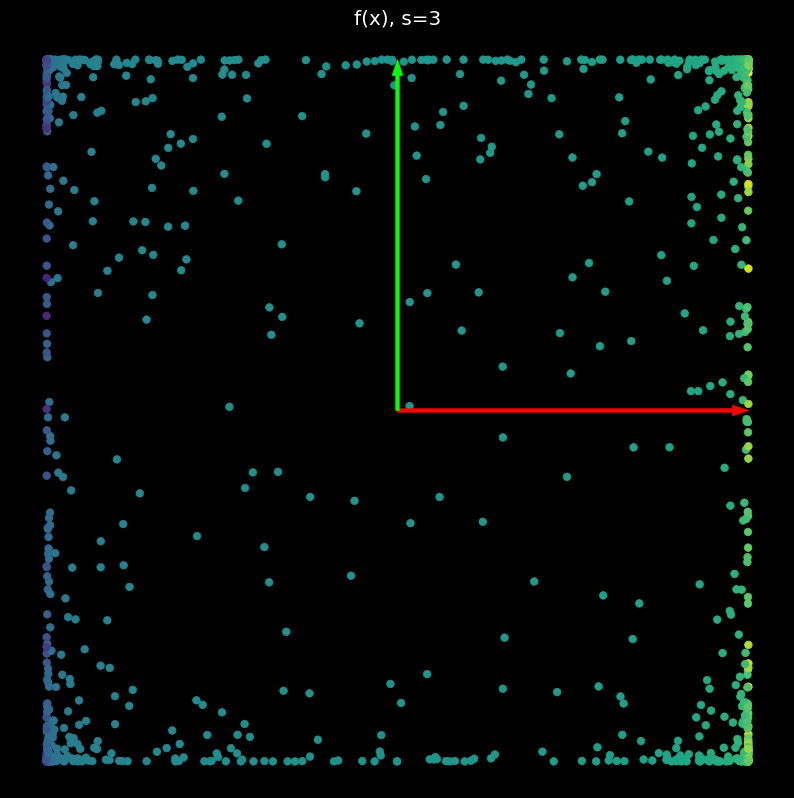

In [15]:
model = nn.Sequential(
        nn.Linear(2, 2, bias=False),
        nn.Tanh()
)
s = 3
W = s * torch.eye(2)
model[0].weight.data.copy_(W)
Y = model(X).data
show_scatterplot(Y, colors, title=f'f(x), s={s}')
plot_bases(OI, width=0.01)

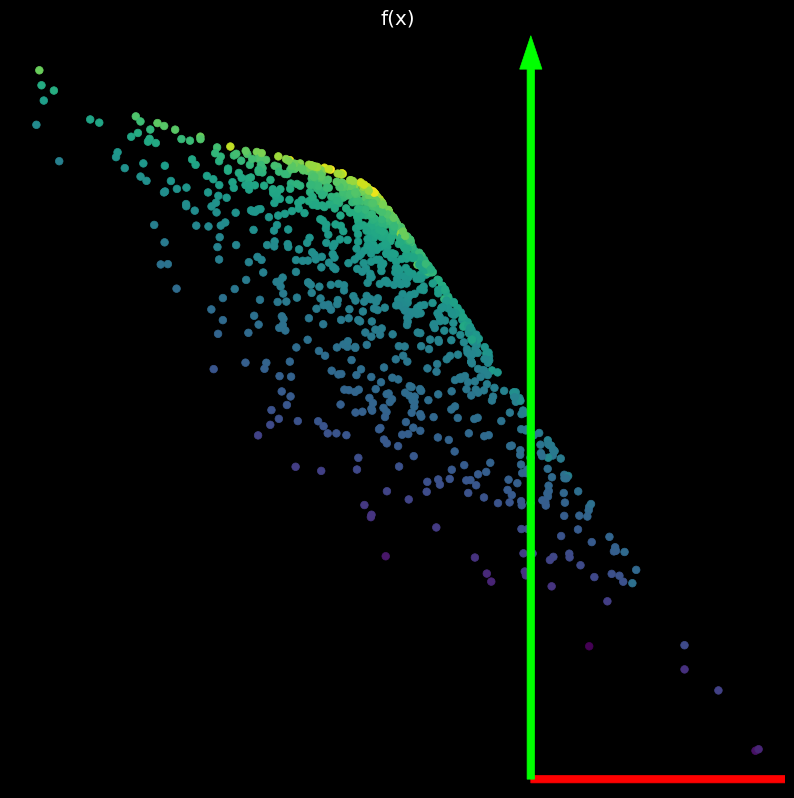

In [17]:
n_hidden = 5
NL = nn.Tanh()
model = nn.Sequential(
		nn.Linear(2, n_hidden), 
		NL, 
		nn.Linear(n_hidden, 2)
	)
with torch.no_grad():
	Y = model(X)
show_scatterplot(Y, colors, title='f(x)')
plot_bases(OI, width=0.01)